In [4]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("../preprocessed_data/df2.csv")
prices = df["price"]
del df["price"]
del df["Unnamed: 0"]

In [6]:
scaleobj = StandardScaler()
scaled_data = scaleobj.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)

In [7]:
scaled_df

,cpu_cores,cpu_threads,cpu_basespeed,cpu_turbospeed,gpu_basespeed,gpu_turbospeed,pixel_shaders,gpu_memory,memory_speed,ram,weight,inch,resolution,ssd
0,-1.250354,-1.472632,-1.582155,-1.510042,-1.026862,-1.477803,-0.839060,-0.819287,-0.853432,-1.019250,-1.765732,-2.374312,-0.721084,-0.787887
1,-1.250354,-1.472632,-1.582155,-1.510042,-1.026862,-1.477803,-0.839060,-0.819287,-0.853432,-0.900989,-1.420940,-2.374312,-0.721084,-0.787887
2,-1.250354,-1.472632,-1.582155,-1.510042,-1.026862,-1.477803,-0.839060,-0.819287,-0.853432,-0.900989,-1.610576,-2.374312,-0.721084,-0.787887
3,-1.250354,-1.472632,-1.582155,-1.510042,-1.026862,-1.477803,-0.839060,-0.819287,-0.853432,-0.900989,-1.420940,-2.374312,-0.721084,-0.804804
4,-1.250354,-1.472632,-1.582155,-1.510042,-1.026862,-1.477803,-0.839060,-0.819287,-0.853432,-0.900989,-0.938232,-0.756078,-0.721084,-0.787887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,2.151650,2.008527,0.373740,1.159592,1.180660,0.506887,1.021993,2.099378,1.465043,-0.191426,-0.007294,0.592451,1.885754,0.235619
3914,-0.116352,0.019293,1.188696,-0.175225,0.602289,0.166182,-0.072169,0.640046,0.112599,0.754658,1.268435,0.322745,-0.170320,0.235619
3915,-0.116352,0.019293,0.210749,-0.781960,0.187275,-0.981631,0.084140,-0.089620,-0.080607,-0.664468,1.682185,-0.756078,-0.510935,-0.551042
3916,-1.250354,-0.975324,-1.419164,-1.146001,-1.468367,-0.816240,-0.824406,-0.819287,-0.853432,-0.664468,-1.403701,-1.228063,1.811438,-0.280363


In [8]:
sum_sqdist = []
for k in range(1,15):
    clustering_kmeans = KMeans(n_clusters=k, init="k-means++",max_iter=1000)
    clustering_kmeans = clustering_kmeans.fit(scaled_df)
    sum_sqdist.append(clustering_kmeans.inertia_)

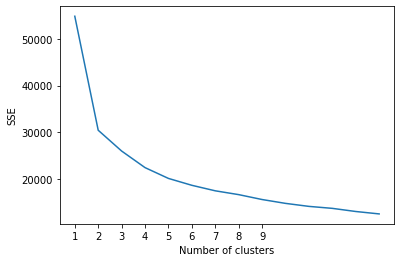

In [9]:
plt.plot(range(1,15),sum_sqdist)
plt.xticks(range(1,10))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [10]:
from kneed import KneeLocator
kl = KneeLocator(range(1,15), sum_sqdist, curve='convex', direction='decreasing')
kl.elbow

4

In [11]:
kmeans_cluster = KMeans(n_clusters = 4, init = "k-means++", max_iter=1000)
kmeans_cluster.fit(scaled_df)

KMeans(max_iter=1000, n_clusters=4)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_df, columns = ["PCA Component 1", "PCA Component 2"])
pca_df['cluster'] = kmeans_cluster.labels_

In [27]:
pca_df

,PCA Component 1,PCA Component 2,cluster,price
0,-4.605307,1.533770,0,158.0
1,-4.494913,1.332717,0,252.0
2,-4.541374,1.444018,0,263.0
3,-4.497728,1.328311,0,269.0
4,-3.990906,0.128450,0,269.0
...,...,...,...,...
3913,4.033281,1.100808,3,2849.0
3914,1.194603,-0.999187,1,2700.0
3915,-0.527226,-0.650660,2,2999.0
3916,-3.385520,0.551517,0,769.0


<AxesSubplot:xlabel='PCA Component 1', ylabel='PCA Component 2'>

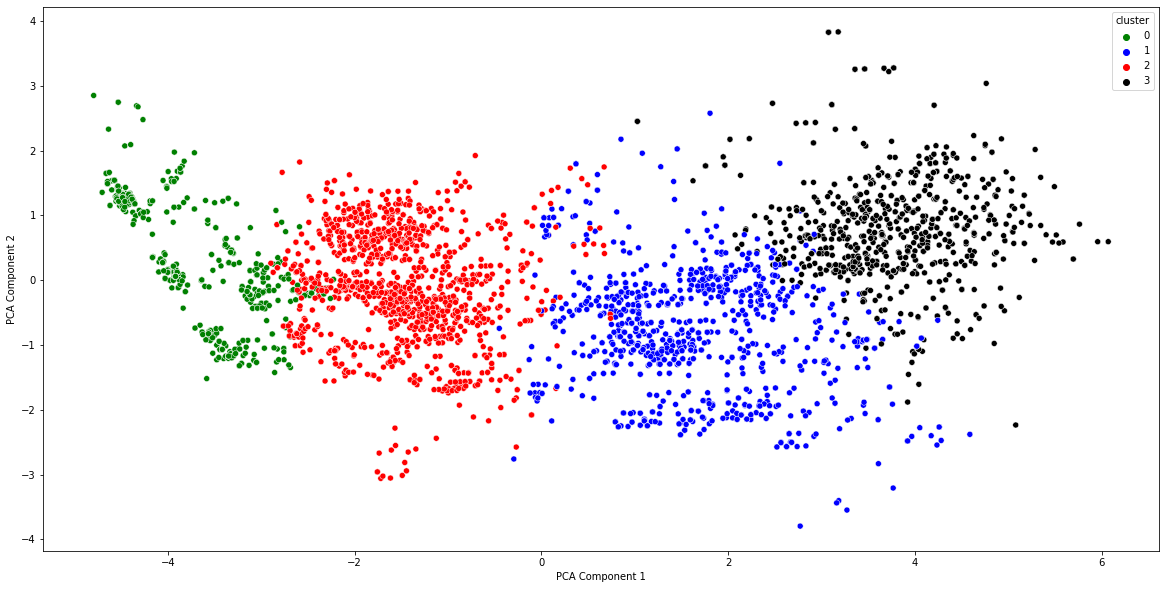

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=pca_df, x="PCA Component 1", y="PCA Component 2", hue='cluster',palette=['green','blue','red','black'])

In [30]:
df['cluster'] = kmeans_cluster.labels_
df['price'] = prices

In [31]:
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]
cluster3 = df[df['cluster']==3]

<AxesSubplot:xlabel='Cluster', ylabel='price'>

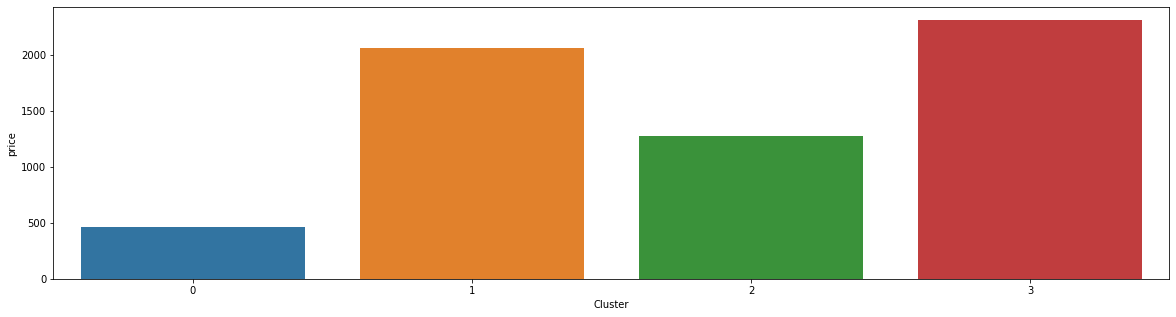

In [32]:
prices = df.groupby("cluster").mean()["price"]
clusters = [cluster for cluster, df in df.groupby('cluster')]

plt.figure(figsize=(20,5))
plt.xlabel("Cluster")
sns.barplot(clusters, prices)

<AxesSubplot:xlabel='cluster', ylabel='price'>

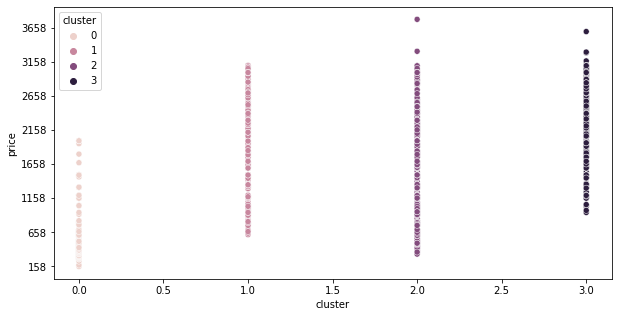

In [33]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(min(df["price"]), max(df["price"])+1, 500))
sns.scatterplot(data=df,y="price",x="cluster", hue="cluster", sizes=(20,100))

# SSD

In [35]:
available_ssd = df['ssd'].unique()

In [36]:
ssd_cluster0 = pd.DataFrame()
ssd_cluster0['ssd'] = available_ssd
temp = []
for ssd in available_ssd:
    temp.append(len(cluster0[cluster0['ssd']==ssd]))
ssd_cluster0['count'] = temp

<AxesSubplot:xlabel='ssd', ylabel='count'>

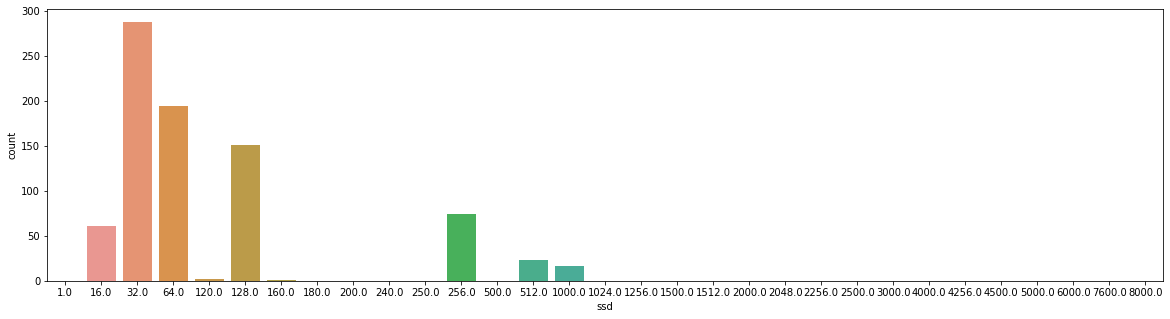

In [37]:
plt.figure(figsize=(20,5))
sns.barplot(x=ssd_cluster0['ssd'],y=ssd_cluster0['count'])

In [38]:
ssd_cluster1 = pd.DataFrame()
ssd_cluster1['ssd'] = available_ssd
temp = []
for ssd in available_ssd:
    temp.append(len(cluster1[cluster1['ssd']==ssd]))
ssd_cluster1['count'] = temp

<AxesSubplot:xlabel='ssd', ylabel='count'>

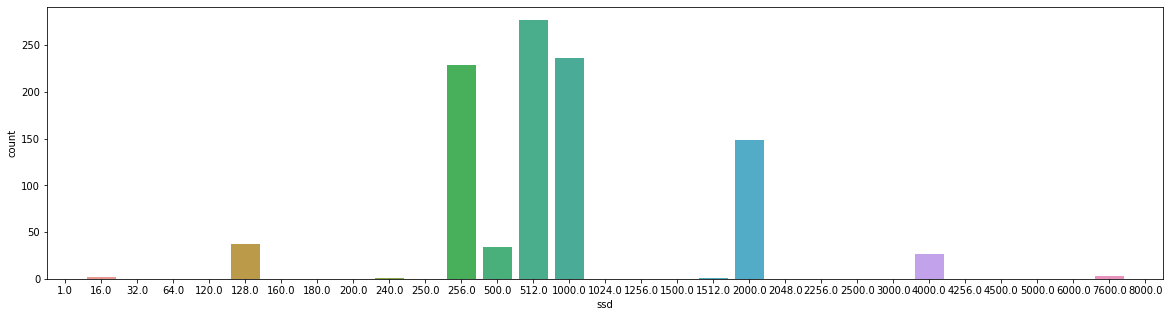

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(x=ssd_cluster1['ssd'],y=ssd_cluster1['count'])

In [40]:
ssd_cluster2 = pd.DataFrame()
ssd_cluster2['ssd'] = available_ssd
temp = []
for ssd in available_ssd:
    temp.append(len(cluster2[cluster2['ssd']==ssd]))
ssd_cluster2['count'] = temp

<AxesSubplot:xlabel='ssd', ylabel='count'>

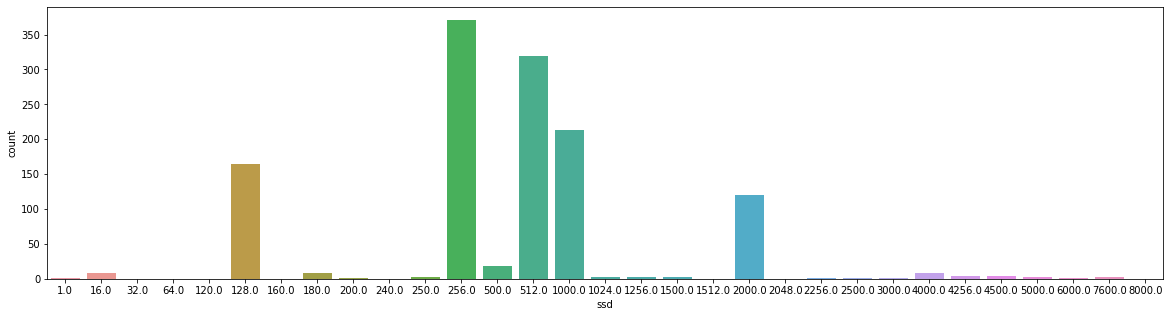

In [41]:
plt.figure(figsize=(20,5))
sns.barplot(x=ssd_cluster2['ssd'],y=ssd_cluster2['count'])

In [42]:
ssd_cluster3 = pd.DataFrame()
ssd_cluster3['ssd'] = available_ssd
temp = []
for ssd in available_ssd:
    temp.append(len(cluster3[cluster3['ssd']==ssd]))
ssd_cluster3['count'] = temp

<AxesSubplot:xlabel='ssd', ylabel='count'>

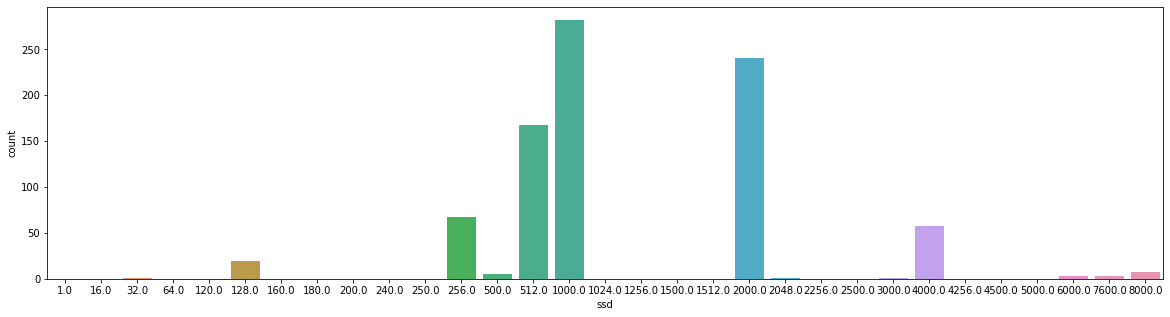

In [43]:
plt.figure(figsize=(20,5))
sns.barplot(x=ssd_cluster3['ssd'],y=ssd_cluster3['count'])

In [105]:
df.head(3)

,cpu_cores,cpu_threads,cpu_basespeed,cpu_turbospeed,gpu_basespeed,gpu_turbospeed,pixel_shaders,gpu_memory,memory_speed,ram,weight,inch,resolution,ssd,cluster,price
0,2.0,2.0,1.1,2.6,0.3,0.7,12.0,0.0,0.0,2.0,0.98,11.6,1.049088,32.0,0,158.0
1,2.0,2.0,1.1,2.6,0.3,0.7,12.0,0.0,0.0,4.0,1.18,11.6,1.049088,32.0,0,252.0
2,2.0,2.0,1.1,2.6,0.3,0.7,12.0,0.0,0.0,4.0,1.07,11.6,1.049088,32.0,0,263.0


# RAM

In [106]:
available_ram = df['ram'].unique()

In [107]:
ram_cluster0 = pd.DataFrame()
ram_cluster0['ram'] = available_ram
temp = []
for ram in available_ram:
    temp.append(len(cluster0[cluster0['ram']==ram]))
ram_cluster0['count'] = temp

<AxesSubplot:xlabel='ram', ylabel='count'>

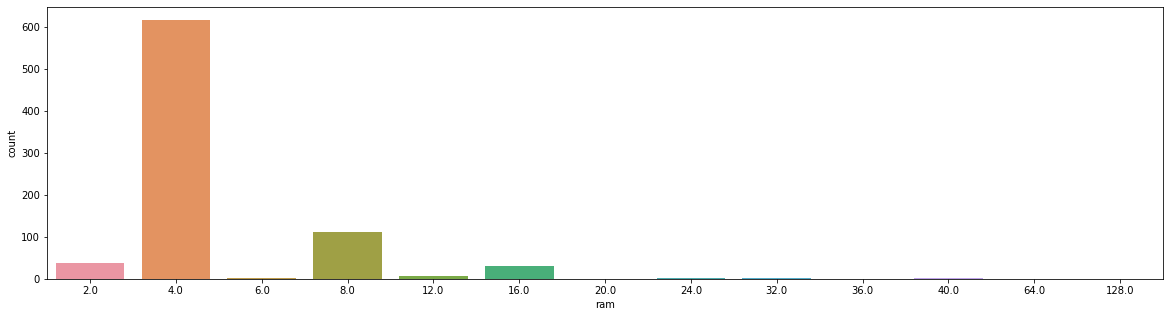

In [108]:
plt.figure(figsize=(20,5))
sns.barplot(x=ram_cluster0['ram'],y=ram_cluster0['count'])

In [109]:
ram_cluster1 = pd.DataFrame()
ram_cluster1['ram'] = available_ram
temp = []
for ram in available_ram:
    temp.append(len(cluster1[cluster1['ram']==ram]))
ram_cluster1['count'] = temp

<AxesSubplot:xlabel='ram', ylabel='count'>

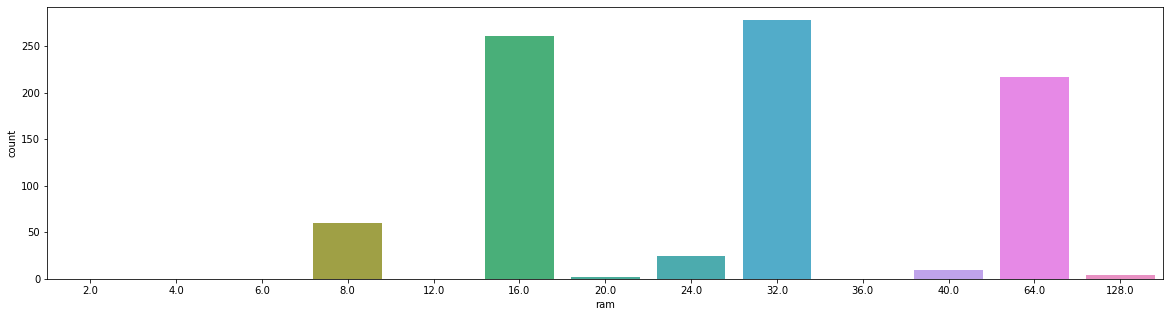

In [110]:
plt.figure(figsize=(20,5))
sns.barplot(x=ram_cluster1['ram'],y=ram_cluster1['count'])

In [111]:
ram_cluster2 = pd.DataFrame()
ram_cluster2['ram'] = available_ram
temp = []
for ram in available_ram:
    temp.append(len(cluster2[cluster2['ram']==ram]))
ram_cluster2['count'] = temp

<AxesSubplot:xlabel='ram', ylabel='count'>

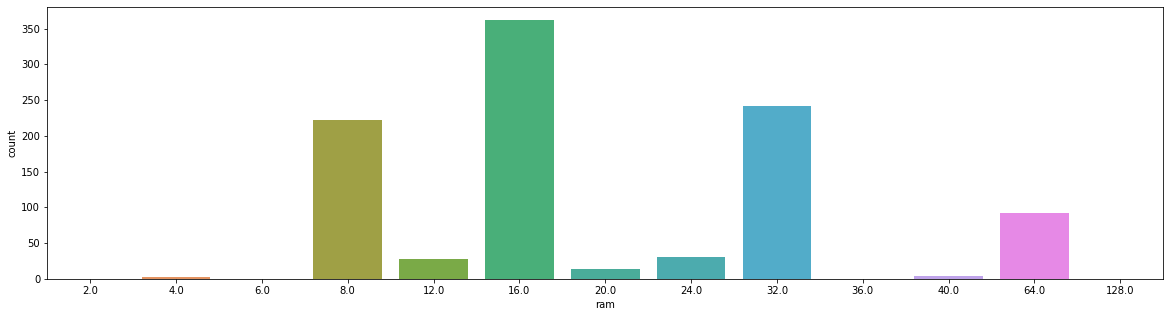

In [112]:
plt.figure(figsize=(20,5))
sns.barplot(x=ram_cluster2['ram'],y=ram_cluster2['count'])

In [113]:
ram_cluster3 = pd.DataFrame()
ram_cluster3['ram'] = available_ram
temp = []
for ram in available_ram:
    temp.append(len(cluster3[cluster3['ram']==ram]))
ram_cluster3['count'] = temp

<AxesSubplot:xlabel='ram', ylabel='count'>

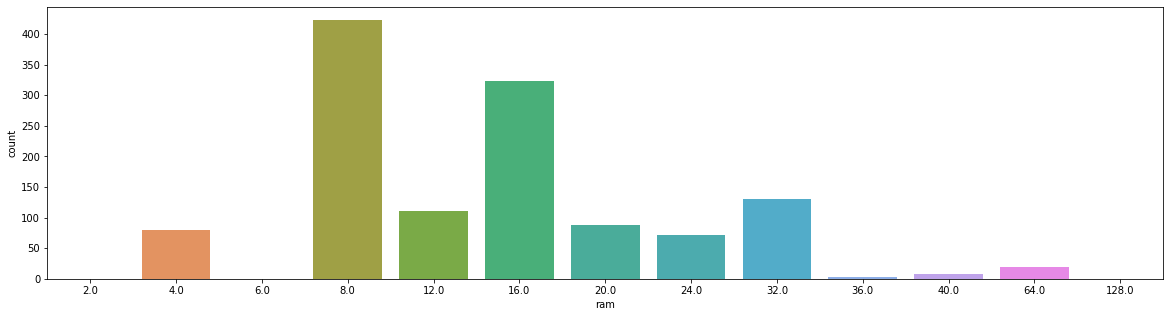

In [114]:
plt.figure(figsize=(20,5))
sns.barplot(x=ram_cluster3['ram'],y=ram_cluster3['count'])

In [115]:
ram_cluster0['cluster']=0

In [116]:
ram_cluster1['cluster']=1

In [117]:
ram_cluster2['cluster']=2

In [118]:
ram_clusters = ram_cluster1.append(ram_cluster0).append(ram_cluster2)

In [119]:
ram_clusters

,ram,count,cluster
0,2.0,0,1
1,4.0,0,1
2,6.0,0,1
3,8.0,60,1
4,16.0,261,1
5,12.0,0,1
6,20.0,2,1
7,32.0,278,1
8,24.0,25,1
9,40.0,9,1


<AxesSubplot:xlabel='ram', ylabel='count'>

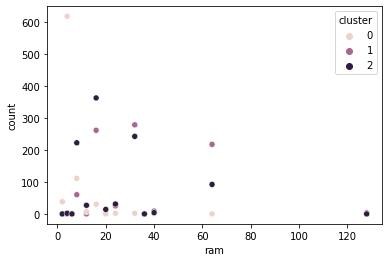

In [120]:
sns.scatterplot(data=ram_clusters,x='ram',y='count',hue='cluster')